# Purpose

Explore and come to understand mesh object properties.

In [1]:
from skfem import *
from skfem.models.poisson import laplace, mass
from skfem.io import from_meshio

import numpy as np
import matplotlib.pyplot as plt


# From Example 13

In [10]:
radii = [1.0, 2.0]
lcar = 0.1

mesh = MeshTri.init_tensor(
    np.linspace(*radii, 1 + int(np.diff(radii) / lcar)),
    np.linspace(0, np.pi / 2, 1 + int(3 * np.pi / 4 / lcar)),
).with_boundaries(
    {
        "ground": lambda xi: xi[1] == 0.0,
        "positive": lambda xi: xi[1] == np.pi / 2,
    }
)

/var/folders/tv/5t3f3sm57dq1rdrd6cnz0j8h0000gp/T/ipykernel_92838/2097401140.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  np.linspace(*radii, 1 + int(np.diff(radii) / lcar)),


<skfem MeshTri1 object>
  Number of elements: 460
  Number of vertices: 264
  Number of nodes: 264
  Named boundaries [# facets]: left [23], bottom [10], right [23], top [10], ground [10], positive [10]


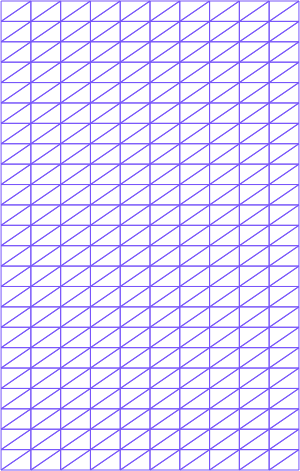

In [11]:
print(mesh)
mesh

In [12]:
mesh = mesh.translated(
    mesh.p[0] * np.stack([np.cos(mesh.p[1]), np.sin(mesh.p[1])]) - mesh.p
)

<skfem MeshTri1 object>
  Number of elements: 460
  Number of vertices: 264
  Number of nodes: 264
  Named boundaries [# facets]: left [23], bottom [10], right [23], top [10], ground [10], positive [10]


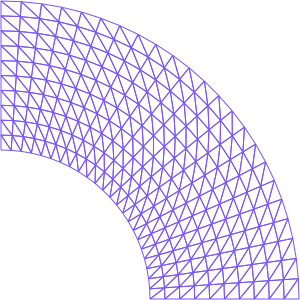

In [13]:
print(mesh)
mesh

## `mesh.p` contains node coordinates

In [4]:
mesh.p.shape

(2, 264)

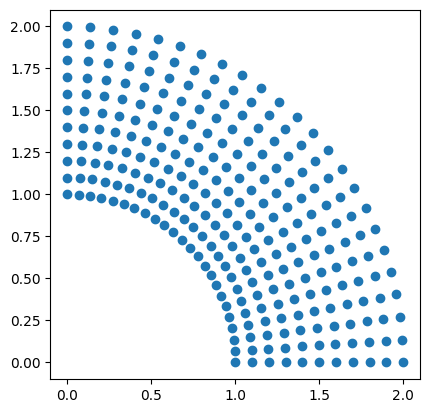

In [5]:
fig, ax = plt.subplots()
ax.scatter(x=mesh.p[0], y=mesh.p[1])
ax.set_aspect('equal', 'box')

In [6]:
help(mesh)

Help on MeshTri1 in module skfem.mesh.mesh_tri_1 object:

class MeshTri1(skfem.mesh.mesh_simplex.MeshSimplex, skfem.mesh.mesh_2d.Mesh2D)
 |  MeshTri1(doflocs: numpy.ndarray = <factory>, t: numpy.ndarray = <factory>, _boundaries: Optional[Dict[str, numpy.ndarray]] = None, _subdomains: Optional[Dict[str, numpy.ndarray]] = None, elem: Type[skfem.element.element.Element] = <class 'skfem.element.element_tri.element_tri_p1.ElementTriP1'>, affine: bool = True, sort_t: bool = True, validate: bool = True) -> None
 |
 |  A standard first-order triangular mesh.
 |
 |  Method resolution order:
 |      MeshTri1
 |      skfem.mesh.mesh_simplex.MeshSimplex
 |      skfem.mesh.mesh_2d.Mesh2D
 |      skfem.mesh.mesh.Mesh
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __eq__(self, other)
 |      Return self==value.
 |
 |  __init__(self, doflocs: numpy.ndarray = <factory>, t: numpy.ndarray = <factory>, _boundaries: Optional[Dict[str, numpy.ndarray]] = None, _subdomains: Optional[Dict[str, num